### **Simple Neural Networks with Tensorflow**

In [1]:
import tensorflow as tf

#### ***1. Building fully connected, sequential neural network sturctures:***

In [2]:
# To define a network
from tensorflow.keras.models import Sequential

In [3]:
# To define a fully connected layer
from tensorflow.keras.layers import Dense

In [4]:
# It includes the number of nodes and the activation function for that layer, for example
tf.keras.layers.Dense(64, activation='relu')

<Dense name=dense, built=False>

#### ***2. Loss functions:***

Can be defined with imported functions, or simply declared.

In [11]:
from tensorflow.keras import losses

In [12]:
# within which we access the loss functions like:
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.losses import MeanAbsoluteError
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import Hinge

#### ***3. Optimizers:***

In [13]:
import tensorflow.keras.optimizers

In [14]:
# from which, we can access various optimizers like:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adagrad

More functions exist for building parallel, convolutional and recurrent neural networks.

#### ***4. Compiling and fitting neural networks:***

After building the network structure, you compile it with the following parameters :

1) ***optimizer:*** The optimizer to be used, also takes the initial learning rate as arguement
2) ***loss:*** Takes the loss function to be used
3) ***metrics:*** Specify the metrics that the model will calculate for its performance

In [16]:
# model.compile(optimizer= '<>', loss = '<>', metrics = ['<>',])

Once the neural net is compiled, you fit/train it on the training data with the following parameters :
1) ***epochs:*** Number of epochs
2) ***validation_data:*** Pass the test/validation split
3) ***callbacks:*** Specify callback features for learning rate schedulers, early stopping etc.
4) ***verbose:*** As the model is fitted, for every epoch the model can report its fitting time, accuracy, etc. If verbose is set to 1, this history is printed as output. The entire history log can also be saved by assigning to a variable.

In [17]:
# history = model.fit(X_train, y_train, epochs = <>, validation_data = (x_valid,y_valid), callbacks ='')

The ‘histroy’ variable contains the logs of the model’s fitting history, and can be printed, or accessed.

It is used to visualise the model’s performance with the number of epochs.

#### ***5. Generating predictions and evaluating the neural net:***

model.predict(<>) : Returns model’s output for the given input data

In [18]:
# predictions = model.predict(input)

model.evaluate(X,y) : Returns the metrics calculated for the model’s output for the given data

#### ***6. Saving and loading the model***

A neural network model can be saved with the function :

In [19]:
# model.save('/directory/<name>.h5')

This saves the model with its architecture and weights in the directory of the given path.

A saved model can be loaded with the function:

tensorflow.keras.models.load_model(‘model.h5’)

In [21]:
# model_b = tensorflow.keras.models.load_model('model.h5')

##### ***Putting it all together with an example:***
We will use the Boston Housing dataset for price prediction, which is a regression problem.

Loading and preparing data :

In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
import numpy as np
import matplotlib.pyplot as plt

In [23]:
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


In [24]:
mean = x_train.mean(axis=0)
std = x_train.std(axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

##### ***a) Build a model structure :***
1) We are building a simple model with one hidden layer.
2) The last layer has one parameter, because our output is one value - the predicted price. In cases of classification problems, the output layer has a specific type of activation function.

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model1 = Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
    ])

c:\Users\Thinkpad\miniconda3\envs\faisal\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


##### ***b) Compile the model with the appropriate loss functions, optimizer***
- The problem is predicting a value, so we can use the Mean Absolute Error loss function.
- The Adam optimizer is used, and the learning rate is set to 0.001 initially.
- The metric passed is Mean absolute error, which is appropriate for this regression problem.

In [26]:
from tensorflow.keras.optimizers import Adam

model1.compile(optimizer = Adam(learning_rate = 0.001),
               loss='mean_squared_error',
               metrics=['mean_absolute_error'])

##### ***c) Fitting the model for 10 epochs***
We are not defining any callbacks like learning rate schedulers, because this problem does not merit using them.

In [27]:
history = model1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose = 1)

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 585.2507 - mean_absolute_error: 22.1026 - val_loss: 557.6064 - val_mean_absolute_error: 21.7292
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 551.2177 - mean_absolute_error: 21.3011 - val_loss: 513.5722 - val_mean_absolute_error: 20.6320
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 433.9908 - mean_absolute_error: 18.7422 - val_loss: 454.5742 - val_mean_absolute_error: 19.0940
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 397.6475 - mean_absolute_error: 17.7091 - val_loss: 371.0779 - val_mean_absolute_error: 16.9540
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 329.7554 - mean_absolute_error: 15.6787 - val_loss: 270.4181 - val_mean_absolute_error: 14.2708
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 243.3499 - mean_absolute_error: 13.1143 - val_loss: 174.2808 - val_mean_absolute_error: 11.2096
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 145.3965 - mean_a

##### ***d) Visualise the model’s peformance and evaluate it***
We can access the ‘history’ variable to visualise the model’s training performance

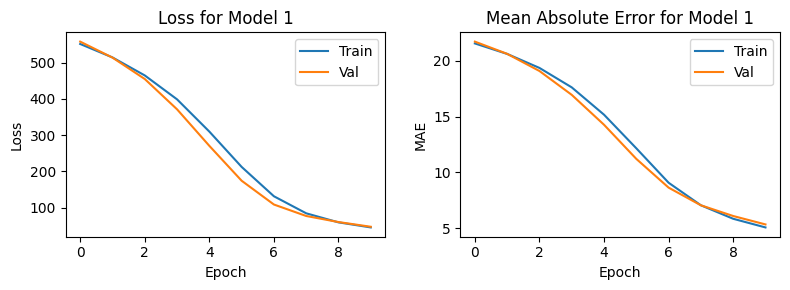

In [43]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss for Model 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])

plt.subplot(1, 2, 2)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error for Model 1')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Val'])

plt.tight_layout()
plt.show()

We can see that the mean absolute error and the loss are both decreasing as the number of epochs increase, so training it for more epochs will better its performance. 

However, simply fitting the model for more epochs will make it go through data it has already processed. So, we will make a copy of the original model.

##### ***e) Training a copy of the model for 20 more epochs than previous model.***

In [32]:
model2 = Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1)
])

In [33]:
model2.compile(optimizer=Adam(learning_rate=0.001),
               loss='mean_squared_error',
               metrics=['mean_absolute_error'])

We will train it for 30 epochs :

In [34]:
history2 = model2.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test), verbose=1)

Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 545.8292 - mean_absolute_error: 21.5774 - val_loss: 557.2095 - val_mean_absolute_error: 21.8338
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 486.3744 - mean_absolute_error: 20.3939 - val_loss: 506.0473 - val_mean_absolute_error: 20.6773
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 479.5264 - mean_absolute_error: 20.1279 - val_loss: 439.9278 - val_mean_absolute_error: 19.0811
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 382.9028 - mean_absolute_error: 17.7678 - val_loss: 357.8699 - val_mean_absolute_error: 16.8843
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 321.1342 - mean_absolute_error: 15.8839 - val_loss: 261.7368 - val_mean_absolute_error: 14.0879
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 209.0535 - mean_absolute_error: 12.4569 - val_loss: 172.0729 - val_mean_absolute_error: 11.3033
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 157.3375 - mean_a

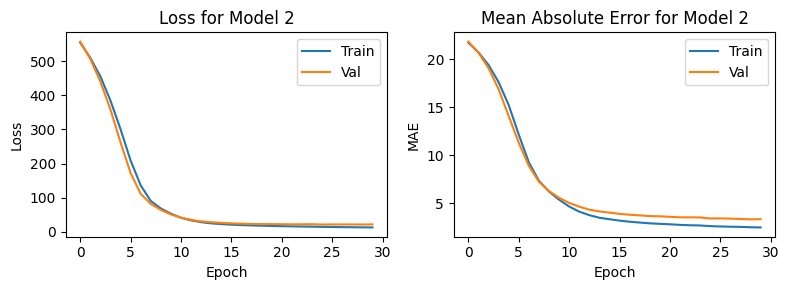

In [35]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Loss for Model 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])

plt.subplot(1, 2, 2)
plt.plot(history2.history['mean_absolute_error'])
plt.plot(history2.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error for Model 2')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Val'])

plt.tight_layout()
plt.show()

On training for 30 epochs, the neural network has improved significantly, reaching mean absolute error value of 2.5, which is fantastic.

Can this model be improved even further by training for 50 epochs ?

What if we add one more hidden layer ?

Let us try.

##### ***f) Training a copy of the model, with an added layer, for 50 epochs :***

In [36]:
model3 = Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

c:\Users\Thinkpad\miniconda3\envs\faisal\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model3.compile(optimizer=Adam(learning_rate=0.001),
                 loss='mean_squared_error',
                 metrics=['mean_absolute_error'])

In [40]:
history3 = model3.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test), verbose=1)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 598.5429 - mean_absolute_error: 22.6443 - val_loss: 576.2346 - val_mean_absolute_error: 22.2385
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 554.8594 - mean_absolute_error: 21.6798 - val_loss: 513.8994 - val_mean_absolute_error: 20.8497
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 474.0469 - mean_absolute_error: 19.8195 - val_loss: 401.0747 - val_mean_absolute_error: 18.0846
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 339.1979 - mean_absolute_error: 16.4417 - val_loss: 227.3801 - val_mean_absolute_error: 13.1046
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 169.6329 - mean_absolute_error: 10.9251 - val_loss: 81.0404 - val_mean_absolute_error: 7.3477
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 59.5269 - mean_absolute_error: 6.1980 - val_loss: 58.5341 - val_mean_absolute_error: 6.2734
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 44.3861 - mean_absolut

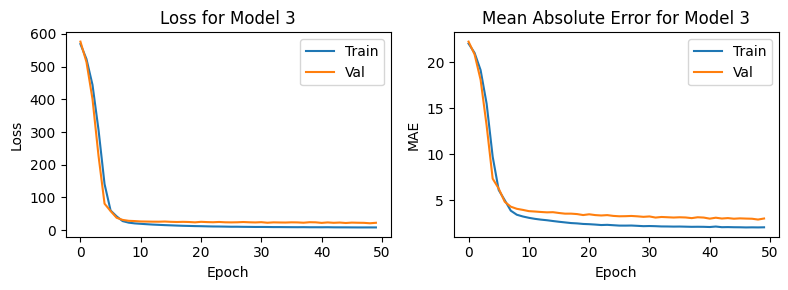

In [41]:
plt.figure(figsize=(8, 3))
plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Loss for Model 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'])

plt.subplot(1, 2, 2)
plt.plot(history3.history['mean_absolute_error'])
plt.plot(history3.history['val_mean_absolute_error'])
plt.title('Mean Absolute Error for Model 3')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend(['Train', 'Val'])

plt.tight_layout()
plt.show()

We can observe that the model’s performance plateaus after the 30th epoch, and further fitting will be pointless.

##### ***g) Saving the neural network :***

In [42]:
model3.save('model3.h5')

***